## 02) 텍스트정제 & 형태소분석

In [2]:
import pandas as pd
import numpy as np
import os
import glob
import re
import pickle
from pprint import pprint #pretty print: 문장 길어질때 조금 정리되게 보임 

In [3]:
from matplotlib import pyplot as plt
# import seaborn as sns
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False # 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
# plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Gulim'

import warnings # 경고 알림 제거
warnings.filterwarnings("ignore", category=Warning) # 경고 알림이 뜨면 모두 무시합니다.

In [4]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) #.0f: 소수점 자리수 지정
pd.set_option('display.min_rows', 20)
pd.set_option('display.max_colwidth', None) #default 50

In [8]:
import nltk

from ckonlpy.tag import Twitter
from ckonlpy.tag import Postprocessor

### 1) 크롤링 데이터 전처리

In [111]:
input_file_name = "data/VCA_2021_08.pk"
with open(input_file_name, 'rb') as f: # read as binary(피클 파일 읽기 위하여)
    df = pickle.load(f)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 323
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category_id      324 non-null    object
 1   article_type     324 non-null    object
 2   article_titles   324 non-null    object
 3   nick_names       324 non-null    object
 4   dates            324 non-null    object
 5   num_views        324 non-null    object
 6   article_content  324 non-null    object
 7   num_comment      324 non-null    object
 8   comment_list     324 non-null    object
dtypes: object(9)
memory usage: 25.3+ KB


In [113]:
df.head()

,category_id,article_type,article_titles,nick_names,dates,num_views,article_content,num_comment,comment_list
0,2931364,명품 시계 토크,이 반클 시계 어떤가용?,리즈벨,2021.08.31.,"1,685",누르면 다리에서 남녀가 만나서 키스 하는건데용가격이 사악하지만 제눈엔 이뻐보이눈데....,29,"[(낙타악어새, 개취라고 생각해요~~제 취향은 ㄴ ㄴ ..ㅠ), (리즈벨작성자, 가..."
1,2930638,자유로운 토크,목걸이 입문 도와주세용!!,angelangel,2021.08.31.,890,명품 목걸이는 처음이에요30대 중반이고 예산500만원 아래에서 보고있어요.​제 스타...,6,"[(블랙금장, 부쉐론이 제일 괜찮아요 ~ 여러가지 하실거 아님 요거 하나로 ~ 캐주..."
2,2930591,"[중고][일반회원]팝니다,교환",[팝니다]\n \n ...,Tccic,2021.08.31.,436,판매가 완료된 상품입니다.\n\n\n\n\n\n[새제품] 18K 다이아몬드 가드링\...,2,"[(슈슈슈크림빵, 저요!!), (Tccic작성자, 네 챗드릴게요)]"
3,2930575,명품 골라주세요,목걸이 추천 부탁드려요,나룡,2021.08.31.,223,생일기념 목걸이 사려고해요(100~200사이)30대 후반에무난하고 차분한 스타일 추...,3,"[(꼼데빠 커플, 30대 시면 티파니 이쁠것 같아요!), (나룡작성자, 곧 40대라..."
4,2930428,보석 쥬얼리 토크,반클리프 색상고민,도리도리d,2021.08.31.,725,안녕하세요 반클 빼를리 뱅글 구매하려고 하는데 고민이 있어요..반클 로즈골드냐 옐로...,5,"[(우앵잉, 전 갠적으로 로골요..!), (치즈라면, 로골이요~), (해피한인생, ..."


#### 1-1. 게시글 수 data type 숫자로 변경

In [115]:
# pattern1 = re.compile("만")
df['num_views'] = df['num_views'].apply(lambda x: float(re.sub("만", "", x))*10000 if bool(re.search("만", x)) else float(x.replace(',',''))).astype(int) #float(): str vs astype(float): series

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 323
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category_id      324 non-null    object
 1   article_type     324 non-null    object
 2   article_titles   324 non-null    object
 3   nick_names       324 non-null    object
 4   dates            324 non-null    object
 5   num_views        324 non-null    int32 
 6   article_content  324 non-null    object
 7   num_comment      324 non-null    object
 8   comment_list     324 non-null    object
dtypes: int32(1), object(8)
memory usage: 24.0+ KB


In [117]:
df[df['num_views']>=10000].sort_values('num_views', ascending=False).head()

,category_id,article_type,article_titles,nick_names,dates,num_views,article_content,num_comment,comment_list
290,2869498,명품 OOTD,[명품OOTD 이벤트]\n ...,살아서장까지,2021.08.04.,11000,일상 ootd - 가방 편 입니다.​\n\n\n\n \n\n\n\n\n\n\n\n\...,194,"[(오픈런은못해, 샤인머스켓 시강이에요ㅋㅋㅋ), (살아서장까지작성자, ㅎㅎ 비싼 샤..."


#### 1-2. 댓글 수 숫자로 변경

In [118]:
df['num_comment'] = df['num_comment'].apply(lambda x:int(x.replace(',',''))) #댓글수 천개 넘지 않아 , 없지만 방어코드로

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 323
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category_id      324 non-null    object
 1   article_type     324 non-null    object
 2   article_titles   324 non-null    object
 3   nick_names       324 non-null    object
 4   dates            324 non-null    object
 5   num_views        324 non-null    int32 
 6   article_content  324 non-null    object
 7   num_comment      324 non-null    int64 
 8   comment_list     324 non-null    object
dtypes: int32(1), int64(1), object(7)
memory usage: 24.0+ KB


In [120]:
df.sort_values('num_comment', ascending=False).head(10) #댓글은 100개 넘었을떄 페이지 넘어감

,category_id,article_type,article_titles,nick_names,dates,num_views,article_content,num_comment,comment_list
290,2869498,명품 OOTD,[명품OOTD 이벤트]\n ...,살아서장까지,2021.08.04.,11000,일상 ootd - 가방 편 입니다.​\n\n\n\n \n\n\n\n\n\n\n\n\...,194,"[(오픈런은못해, 샤인머스켓 시강이에요ㅋㅋㅋ), (살아서장까지작성자, ㅎㅎ 비싼 샤..."
310,2865609,명품 OOTD,[명품OOTD 이벤트]\n ...,살아서장까지,2021.08.02.,7647,드디어 등업 ootd 이벤트!이번에도 늦게 알게되었지만 5일 시간 있으니열심히 작성...,92,"[(BigSmileEllie, 룩도 룩이지만 몸매가 다했.....부러워서 댓글 남겨..."
259,2878018,명품착샷&소장품,펑했어요,쫀주,2021.08.08.,4333,​펑~​​​​​​​,78,"[(멋진여성 풀소유, 어떻게해요 ㅠㅠ), (쫀주작성자, 멋진여성님💕💕쎄뻥이 치명적이..."
314,2864660,명품 토크,딸아이 지갑 어떤거 사주세요?,헬로키티3,2021.08.02.,2623,중1 딸아이 키우는데요 . 여자아이들 지갑 뭐 사주시나요?​ 아직 크게 멋부리고...,78,"[(2월어느날, 와… 진짜 세상 많이 바꼈네요), (유노왓, 헐 중1인데 명품이라뇨..."
132,2901782,결혼 토크,결혼시 다이아 안하기도 하나요..?,루피귀염,2021.08.18.,2925,뭔가 알아보다보니 기왕 할거면 브랜드1캐럿 하고싶은데 비용이 3천은 되니까 넘 비싸...,69,"[(JAYLOVE, 저도안했어요~ 악세사리를 안하기도하고 다이아자체에 관심이전혀없어..."
212,2886179,보석 쥬얼리 토크,비제로원미니파베 vs디바스드림다이아 vs반클리프 자개 중에 골라주세요!,Lazuli87,2021.08.12.,4999,아기 엄마라서 데일리 착용하려고 비제로원 미니파베 생각하고 갔어요.비제로원 미니파베...,65,"[(안녕난뚱쏘, 2 제일 잘어울려보여요 🥰), (Lazuli87작성자, 감사합니다😍..."
232,2882717,제휴 업체 구입 후기,드디어 피코탄 18 에토프 금장~~!!(알람 죄송해요) feat. 생일선물,lovelyjihye,2021.08.10.,2327,무더운 요즈음~ 시크님들 잘 지내시나요..오늘 드디어 애증의 피코탄 18 을 받았어...,61,"[(dino123, 우와 예뻐요), (lovelyjihye작성자, 감사해요~~^^♡..."
171,2895115,자유로운 토크,샤넬의 늪 ᆢ나올수 있을까요?,샤넬그만사,2021.08.16.,3064,클미로 시작해ㆍ 모아도 끝이 없을듯요​하나면 끝날줄 알았더니 또사고ㆍ또사고ᆢ신랑이...,61,"[(핑크델루나, 그 늪에서 나오면 다른 늪이 또 기다리고 있어요... ㅜㅜ), (샤..."
243,2880749,자유로운 토크,너무 싫은 직장동료..,밤밤벼리,2021.08.09.,3135,제 직장동료를 A라고 할게요.처음 입사했을때 A는 보세옷에 에코백 들고 다니던 평범...,59,"[(링고19, 진짜를 자꾸 따라 사도 짜증나는 판에 짝퉁으로 따라 산다구요..? 아..."
65,2917742,자유로운 토크,"반클, 프레드 선택ㅡ안목높은 시크님들, 절실히 도움필요해요",모카네,2021.08.25.,2034,팔찌 선택이 너~ ~ 무도 힘들어요.예산 1000선. 캐쥬얼. 원피스 반반 입고 워...,56,"[(tlwms1, 저라면 2번 할래요), (모카네작성자, 프레드 방문전까진2번이 1..."


#### 2. 날짜형식으로 변경
> 요일별 게시물 수 확인

In [121]:
df['new_dates'] = pd.to_datetime(df['dates'], format='%Y.%m.%d.', errors='ignore') #format지정없이 to_datetime 사용시 변환됨

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 323
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   category_id      324 non-null    object        
 1   article_type     324 non-null    object        
 2   article_titles   324 non-null    object        
 3   nick_names       324 non-null    object        
 4   dates            324 non-null    object        
 5   num_views        324 non-null    int32         
 6   article_content  324 non-null    object        
 7   num_comment      324 non-null    int64         
 8   comment_list     324 non-null    object        
 9   new_dates        324 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int32(1), int64(1), object(7)
memory usage: 26.6+ KB


In [123]:
# 년, 월, 일, 요일 컬럼 생성
df['year'] = df['new_dates'].apply(lambda x:x.year) 
df['month'] = df['new_dates'].apply(lambda x:x.month)
df['day'] = df['new_dates'].apply(lambda x:x.day)
df['weekday'] = df['new_dates'].apply(lambda x:x.weekday()) #월요일0,일요일6

In [124]:
df.head()

,category_id,article_type,article_titles,nick_names,dates,num_views,article_content,num_comment,comment_list,new_dates,year,month,day,weekday
0,2931364,명품 시계 토크,이 반클 시계 어떤가용?,리즈벨,2021.08.31.,1685,누르면 다리에서 남녀가 만나서 키스 하는건데용가격이 사악하지만 제눈엔 이뻐보이눈데....,29,"[(낙타악어새, 개취라고 생각해요~~제 취향은 ㄴ ㄴ ..ㅠ), (리즈벨작성자, 가...",2021-08-31,2021,8,31,1
1,2930638,자유로운 토크,목걸이 입문 도와주세용!!,angelangel,2021.08.31.,890,명품 목걸이는 처음이에요30대 중반이고 예산500만원 아래에서 보고있어요.​제 스타...,6,"[(블랙금장, 부쉐론이 제일 괜찮아요 ~ 여러가지 하실거 아님 요거 하나로 ~ 캐주...",2021-08-31,2021,8,31,1
2,2930591,"[중고][일반회원]팝니다,교환",[팝니다]\n \n ...,Tccic,2021.08.31.,436,판매가 완료된 상품입니다.\n\n\n\n\n\n[새제품] 18K 다이아몬드 가드링\...,2,"[(슈슈슈크림빵, 저요!!), (Tccic작성자, 네 챗드릴게요)]",2021-08-31,2021,8,31,1
3,2930575,명품 골라주세요,목걸이 추천 부탁드려요,나룡,2021.08.31.,223,생일기념 목걸이 사려고해요(100~200사이)30대 후반에무난하고 차분한 스타일 추...,3,"[(꼼데빠 커플, 30대 시면 티파니 이쁠것 같아요!), (나룡작성자, 곧 40대라...",2021-08-31,2021,8,31,1
4,2930428,보석 쥬얼리 토크,반클리프 색상고민,도리도리d,2021.08.31.,725,안녕하세요 반클 빼를리 뱅글 구매하려고 하는데 고민이 있어요..반클 로즈골드냐 옐로...,5,"[(우앵잉, 전 갠적으로 로골요..!), (치즈라면, 로골이요~), (해피한인생, ...",2021-08-31,2021,8,31,1


Text(0.5, 0.98, '제목')

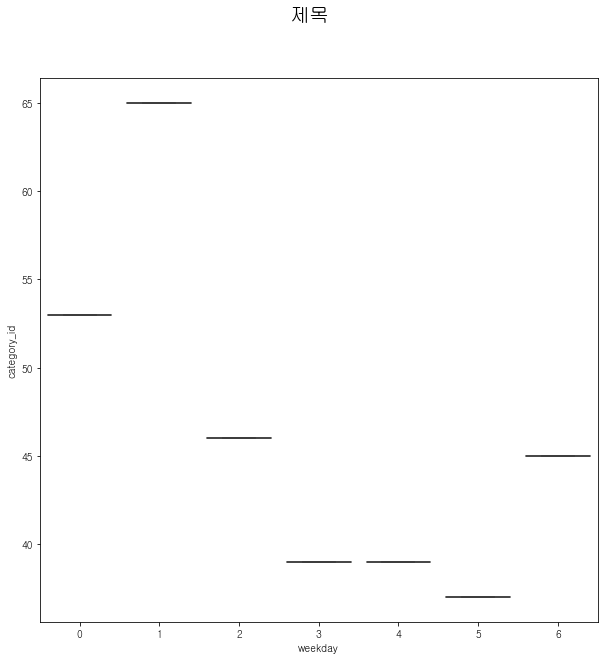

In [125]:
# 요일별 게시글수?
week = df.groupby('weekday')['category_id'].count().reset_index()

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.boxplot(x="weekday", y="category_id", data=week)
fig.suptitle('제목', fontsize=20)
# plt.savefig("boxplot.png", bbox_inches='tight')

#### 3. 중고거래 게시판의 내용을 drop

#### 3-1. article type별 언급 횟수

In [126]:
df.groupby('article_type')['article_titles'].count().reset_index().sort_values('article_titles', ascending=False).head(20)

,article_type,article_titles
17,자유로운 토크,150
13,명품 토크,67
15,보석 쥬얼리 토크,33
8,명품 골라주세요,30
7,명품 Q&A,13
6,명품 OOTD,5
1,"[중고][일반회원]팝니다,교환",4
10,"명품 사용기, 리뷰",4
14,명품착샷&소장품,4
9,"명품 매장 재고, 오픈런 토크",3


In [127]:
df[df['article_type']=='N/A']

,category_id,article_type,article_titles,nick_names,dates,num_views,article_content,num_comment,comment_list,new_dates,year,month,day,weekday


#### 3-2. 하단의 게시판만 포함시켜 df1로 저장

In [128]:
df1 = df[df['article_type'].isin(['자유로운 토크','명품 토크','명품착샷&소장품','명품 매장 재고','오픈런 토크','명품 골라주세요','명품 사용기, 리뷰','명품 Q&A',\
                                  '명품 시계 토크', '보석 쥬얼리 토크', 'N/A', '연예인 명품 패션', '샤넬 팬 게시판', '에르메스 팬 게시판', '디올 팬 게시판'\
                                 '루이비통 팬 게시판', '롤렉스 팬 게시판', '명품 OOTD', '결혼 토크', '예물 토크', '연예&사랑 토크', '명품 신상 사진'])]

In [129]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 0 to 323
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   category_id      311 non-null    object        
 1   article_type     311 non-null    object        
 2   article_titles   311 non-null    object        
 3   nick_names       311 non-null    object        
 4   dates            311 non-null    object        
 5   num_views        311 non-null    int32         
 6   article_content  311 non-null    object        
 7   num_comment      311 non-null    int64         
 8   comment_list     311 non-null    object        
 9   new_dates        311 non-null    datetime64[ns]
 10  year             311 non-null    int64         
 11  month            311 non-null    int64         
 12  day              311 non-null    int64         
 13  weekday          311 non-null    int64         
dtypes: datetime64[ns](1), int32(1), int64(5), 

In [130]:
df1.head()

,category_id,article_type,article_titles,nick_names,dates,num_views,article_content,num_comment,comment_list,new_dates,year,month,day,weekday
0,2931364,명품 시계 토크,이 반클 시계 어떤가용?,리즈벨,2021.08.31.,1685,누르면 다리에서 남녀가 만나서 키스 하는건데용가격이 사악하지만 제눈엔 이뻐보이눈데....,29,"[(낙타악어새, 개취라고 생각해요~~제 취향은 ㄴ ㄴ ..ㅠ), (리즈벨작성자, 가...",2021-08-31,2021,8,31,1
1,2930638,자유로운 토크,목걸이 입문 도와주세용!!,angelangel,2021.08.31.,890,명품 목걸이는 처음이에요30대 중반이고 예산500만원 아래에서 보고있어요.​제 스타...,6,"[(블랙금장, 부쉐론이 제일 괜찮아요 ~ 여러가지 하실거 아님 요거 하나로 ~ 캐주...",2021-08-31,2021,8,31,1
3,2930575,명품 골라주세요,목걸이 추천 부탁드려요,나룡,2021.08.31.,223,생일기념 목걸이 사려고해요(100~200사이)30대 후반에무난하고 차분한 스타일 추...,3,"[(꼼데빠 커플, 30대 시면 티파니 이쁠것 같아요!), (나룡작성자, 곧 40대라...",2021-08-31,2021,8,31,1
4,2930428,보석 쥬얼리 토크,반클리프 색상고민,도리도리d,2021.08.31.,725,안녕하세요 반클 빼를리 뱅글 구매하려고 하는데 고민이 있어요..반클 로즈골드냐 옐로...,5,"[(우앵잉, 전 갠적으로 로골요..!), (치즈라면, 로골이요~), (해피한인생, ...",2021-08-31,2021,8,31,1
5,2930407,명품 골라주세요,까르띠에 러브sm 핑크골드와 어울릴 팔찌 골라주세요:),o floral o,2021.08.31.,928,"안녕하세요,​까르띠에 러브팔찌 sm 핑크골드 몇년째 문신처럼 하고 다니는데요,갑자기...",5,"[(야옹애옹, 마르게리타 써클 한 개짜리 매장에는 있어서 구매했어요!써클 한 개짜리...",2021-08-31,2021,8,31,1


In [131]:
#pickle: 저장된 list그자체로 저장해서 list를 그 자체로 가져오기위하여
save_file_name = "data/VCA_2021_08_v1.pk"
with open(save_file_name, "wb") as f: #wb: write binary
    pickle.dump(df1, f)

#### 4. 브랜드별 한개 df로 만들기

In [61]:
# folder_path = os.getcwd()
folder_path = "data"

first_doc = True #처음 기본이 되는 데이터 프레임 => 추후 병합 위함
for filename in glob.glob(os.path.join(folder_path, 'VCA*v1.pk')):
    print(filename)
    with open(filename, 'rb') as f: # read as binary(피클 파일 읽기 위하여)
        doc = pickle.load(f)
    if first_doc: #fist_doc이 True면(처음 반복문 돌때)
        df, first_doc = doc, False #첫번째 df를 지금만드는 df로 만들고 & first_doc은 채워졌으므로 false로 만듬 => final_doc가 기본 df이 됨
    else:
        df = pd.concat([df, doc], axis=0)
df = df.sort_values('new_dates', ascending=False, ignore_index=True)    
len(df)

data\VCA_2020_v1.pk
data\VCA_2021_08_v1.pk
data\VCA_2021_v1.pk


3792

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3792 entries, 0 to 3791
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   category_id      3792 non-null   object        
 1   article_type     3792 non-null   object        
 2   article_titles   3792 non-null   object        
 3   nick_names       3792 non-null   object        
 4   dates            3792 non-null   object        
 5   num_views        3792 non-null   int32         
 6   article_content  3792 non-null   object        
 7   num_comment      3792 non-null   int64         
 8   comment_list     3792 non-null   object        
 9   new_dates        3792 non-null   datetime64[ns]
 10  year             3792 non-null   int64         
 11  month            3792 non-null   int64         
 12  day              3792 non-null   int64         
 13  weekday          3792 non-null   int64         
dtypes: datetime64[ns](1), int32(1), int64(5)

In [63]:
df.head()

,category_id,article_type,article_titles,nick_names,dates,num_views,article_content,num_comment,comment_list,new_dates,year,month,day,weekday
0,2931364,명품 시계 토크,이 반클 시계 어떤가용?,리즈벨,2021.08.31.,1685,누르면 다리에서 남녀가 만나서 키스 하는건데용가격이 사악하지만 제눈엔 이뻐보이눈데..별론가용???ㅎㅎㅎ중국분들은 반클리프 시계를 엄청 좋아하더라구요엄청 인기 많은 모델 이라는데 우리나라에선 인기 없는거같기도 해서..,29,"[(낙타악어새, 개취라고 생각해요~~제 취향은 ㄴ ㄴ ..ㅠ), (리즈벨작성자, 가격때문에여ㅠㅠ 1억 오천인가 하더라구여..ㄷ ㄷ), (앵그리 너구리, 전 중궈른인가봐요. 보고 너무너무 이쁘다 했다가 가격보고 아 안 이쁘다 응응 하고 나왔거든요…….), (리즈벨작성자, 저도 중궈른 인가봐요..ㅋㅋㅋㅋㅋ 헉 진짜요? 실물영접 ㅠㅠ전 못해봣어요….. 궁금해요 ㅎㅎ), (사야네르리, 가격때문에 안 좋아해요 .ㅎㅎ), (리즈벨작성자, 맞아요…가격이 무슨… 파텍 풀다야 랑 동급에요 가격이 ㅠ), (카페라떼홀릭, 이뻐요. 이쁘긴 진짜이쁜데..대신 사지는 않을것??못할것??같아요근데 시간은 어떻게 보는거죠???), (리즈벨작성자, 저도 그건 잘 모르겠눈데 열두시가 되면 두 사람이 만나서 뽀뽀 한다고는 하눈데..그러게여 어캐보는거징…ㅎㅎㅎㅎㅎ저는 시계원래 시계를안봐서 ..근데 궁금하네요 진짜), (bluestar, 여자가 시간 남자가 분이에요점점 가까워지다가 뽀뽀^^), (bluestar, 가격이 안예뻐서 그렇지 시계 안좋아하는데 이건 너무 예뻐요), (리즈벨작성자, 그쳐… 전 이거호불호 마니갈릴줄 알앗눈데 의외로 많은분들이 이쁘다 해주시네요 ㅎㅎ맞아요ㅜㅜ넘이뻐용), (영구123, 저 이거 20대때 잡지보고 반해서 가격은 매장문의라길래 눈돌아가서 전화한 기억있는 모델이랑 비슷한 시리즈에요..ㅋㅋㅋㅋㅋ저도 중궈른 취향인가바요), (리즈벨작성자, 마자요…전 제가 워낙 화려한거 좋아해서중국 스탈 ㅎㅎㅎㅎ 리차드밀이랑 반클이 넘 이뻐보이네요🤣🤣가격은 … 안이뻐요), (VVSV, 이거 실물이 훨씬 예뻐요.. 가격은..ㅠㅠ 말잇못), (리즈벨작성자, 헉 실물 ㅠㅠ보신분들이 있네여ㅠ 부러워요 궁금궁금..), (딸기두개, 진짜 너무너무 예뻐요!!! 가격이 너무너무 안이쁘지만요😂), (리즈벨작성자, 맞아여ㅜㅜㅜ 역시 여자들은 보는눈이 다 비슷한가봐용ㅎㅎ히히), (TST, 저 이거 처음 나왔을때 너무 귀엽다고 생각했는데!! 음 하지만 구매로 이어지진 않을거같아요ㅋㅋ), (리즈벨작성자, 마자여 귀여워용!!! 갖고프디만 ㅠㅠ구매하기엔 너무많은것들을 신경써야하네요), (그만사고싶다, 너무 아름답긴 한데 두께가 두꺼워서 둔한 느낌이 들어 아쉬워요^^;; 두께만 얇아지면 사고싶은 시계예요~^^), (리즈벨작성자, 아 그러네용 맞아요 좀 두꺼운거같아요 ㅎㅎ 트루비옹처럼욤 ㅎㅎㅎ저 모델은 얇아도 이쁠거같아요^^), (핑크쿠잉, 너무 예뻐요 그런데 위에 댓글에 가격... 그가격이면 딴거살거 같긴해요 ㅎㅎ), (리즈벨작성자, 그쳐ㅠㅠㅠㅜ 딴거면 예를들어 파텍 같은거용?? 1억 육천 정도면 …), (고등백구, 예쁘긴한데 1억5천 줄 물건은 아닌듯..ㅠㅠ), (리즈벨작성자, 솔직히 너무비싸요…. 반값 으로 할인해도 비싸요🥺), (희희헤헤, 이 시계는 예쁘다 안예쁘다를 떠나서.. 하나의 예술작품 같아요. 어떻게 보면 유치할수 있지만 스토리가 담겨 있잖아요♡여자가 시 남자가 분인 것도 사랑에 빠지는 속도.남자가 다가오는 속도가 더 빠른걸 의미하는것같고 정각에 남녀가 만나서 1분동안 키스하다 헤어지고.. 이걸 또 한치의 오차없이 시계로 재현해낸다는게 아름다워요전세계에 몇개없는 제품이고. 가격이야 이시계 사실 분들이라면 가격대비~ 비교하며 사는 제품은 아닌것 같아요. 소장품인거죠사랑하는 사람에게 받는다면 정말 로맨틱할거같아요. 제가 시계 소장하고 있는 할모니라면 아들한테. 손주한테 사랑하는 여자에게 프로포즈하라고 내어주고싶다 이런 상상도 해보구요 ^^이런 스토리를 담고있는 시계는 다른브랜드에서 없잖아요~), (리즈벨작성자, 어머 시크님 이야기 들으니까 더 서정적이고 너무 로맨틱하네요.. 그러게요 여자가 시간 남자가 분 인거 그냥 단편적으로 생각했는데 남녀 사랑의 속도가 다른걸 의미하는거 같네요 진짜!!! 생각하지 못한 생각 이였어용 ㅎㅎㅎㅎ 짱짱！ 맞아요~~ 뜻과 의미가 있는 시계라 다른 시계들이랑은 다른 의미 일듯 해요~~사랑하는 사람한테받으면 로맨틱 할거같네요^^), (eana, 넘 이뻐요!! 위시템!!), (리즈벨작성자, 저두욤 ㅠㅠㅠㅠ)]",2021-08-31,2021,8,31,1
1,2929719,자유로운 토크,목걸이 반클 따라한것 같나요?,리터치,2021.08.31.,1487,카피 모양 같나요아님 그냥 꽃 모양 같나요?오팔 사고 싶어서 보는데 괜히 오해 받을 디자인인가 싶어서요,8,"[(리또리, 네.. 반클에서 나온건줄 알았어요), (꼬북치입, 카피같아욤), (루비닝, 그런데 예쁘네요 ㅎㅎ), (동이님, 근데 예뻐요..ㅋㅋ 카피라기보다는 그냥 비슷한 디자인 예쁜 거 같아요.), (썸머sum, 카피 느낌이 드네요ㅠ), (livethelifeyoulove, 네 카피), (만듀럽, 넹,,카피느낌이에요), (굼꿈꿈미, 카피느낌....)]",2021-08-31,2021,8,31,1
2,2929351,명품 토크,반클 10 모티브 /스윗알함브라 롱 16 모티브,끄렐루야,2021.08.31.,686,두가지 놓고몇일 고민중에결국은 결정을 못하고 왔어요ㅠㅠ제맘은 16모티브 정하고 갔는데사실은 10도 예뻐서 ㅠㅠ일단은 홀드를 시켜놓고 왔구요16모티브를 하면 혹 후회할까 싶어서올려봅니다..(비주류성향 다분한편😭)데일리용 으로 보는것 아니에요!\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n아님 매직 기요세나 다른원석으로 할까요?커넬리언 5모티브있어서 맞출까했지만목걸이로는 좀 셀것 같아서요😭😭,17,"[(막내 쿠키, 저라면 빈티지 10모티브 추천드려요 더 고급스럽고 부내나요 ㅎㅎ), (끄렐루야작성자, 둘다 너무 맘에들어서 고민이였어요ㅠㅠㅋㅋㅋ16도 너무이뻐서 못놓겠는데 하시는분들이 안계신것같더라규요 시크에 ㅠㅠ 혹시 크게 비주류인가 싶어ㅠㅠㅋㅋ), (스패니시라떼, 본인 스타일이 여성스럽고 멋을 좀 안다 16단아 단정하면 10 이쁠 것 같아요), (끄렐루야작성자, 단아 단정을 추구합니다~^^;; 전 16으로 첨에 맘먹고가긴했었는데..많이 뒤져봤지만 하신 분 을 못찾아서 뭔가 비주류인가ㅠㅠㅋㅋㅋㅋ 이유가있을까 했네요🤔이상하진 않죠?^^;), (과일섬, 솔직히 다 예쁜데평소에 드레스업 스타일이 아니면자주 안쓰고요 10은 자개 추천이요얼굴에 반사판 효과~~ 환해져요), (장구별, 그걸 감안하고 고르긴했는데요 ㅎㅎ아 왜이렇게 안놓아지는지 모르겠어요 ㅠㅠㅋㅋㅋㅋㅋㅋ), (라뉴닝, 10모티브 이뻐용기요세 매직은 금메달 같기도 해용ㅎㅎㅎ), (플라워1225, ㅋㅋ많은분들이 10모티브를 향해투표해주시네요🤤ㅋㅋㅋㅋ 투표가늘어갈수록 저는 수렁으로……(또르르)), (끄렐루야작성자, 10모티브여 저도 10모티브로 사려구요), (땡고객님, 루야님^^ 어떤거 구매 하셨어용? ㅎㅎ), (끄렐루야작성자, 댓글을이제보았어요🤤ㅋㅋㅋㅋ저 10모티브로아무래도 만족이안되어서…ㅋㅋㅋㅋㅋ전혀다른아이를데려왔습니닼ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅌㅌㅋㅋ(ㅅㅈ ㅍ)), (나나보기, 우허헙!!! 더더 예쁜아이로 데려오셨네요😍 ㅇㅏ웅,저도 너무 고민이에요😭), (딸기두개, 거거익선…다(이아)다익선…아니겠습니까….이쁜아이데려오심 보여주세요 내꺼 고민하는것처럼 설레네요 ☺️☺️☺️), (끄렐루야작성자, 아웅,넹 맞아요! 전 요새 다다익선이 그렇게 좋드라구요😂 데려오면 소식 전하겠슴돠😎)]",2021-08-31,2021,8,31,1
3,2929461,자유로운 토크,탱크 머스트 신형 vs. 반클 빈티지,시크조아용,2021.08.31.,544,둘 중에 뭘 살까 고민중이에요.나이는 30대 중반이구요 시계는

In [64]:
df.tail()

,category_id,article_type,article_titles,nick_names,dates,num_views,article_content,num_comment,comment_list,new_dates,year,month,day,weekday
3787,1502559,명품 토크,반클리프갔다가 물욕폭발이네요ㅠ,퍼플피오니,2020.01.02.,2546,출산후 결혼반지 새로하려 봐두었는데 아기 낳고 육아하면서 반지 보는 기준이 바뀌더라구요ㅠ 화려한거 할랬는데 아기보면서 하기엔 좀 불안해서 반클리프가서 깔끔한 반지로 봐두었어요. 근데 이게 웬일.. 저 알함브라 목걸이 진짜 1도 관심없었거든요?ㅠㅠ 근데 자개나 원석류말고 파베세팅된 알함브라 스윗사이즈.. 아 너는 내운명.. 넘 예뻐서 머릿속에서 떠나질 않네요ㅠㅠ 남편도 평상시보다 반응이 좋더라구요 진짜 예쁘다구ㅎㅎ 사이즈대비 되게 비싸던데.. 이정도 반응이면 저 조만간 살 수 있겠죠?,16,"[(퍼플피오니작성자, 네 맞아요 그거...ㅠㅠ 너무 예쁘고 비싼데, 지금 바로도 못산다더라구요ㅠ 없어서 못판다네용 후), (퍼플피오니작성자, ㅠㅠ 저는 예정에 없던 목걸이라 총알충전 좀 더 해야할거같아요 이럴줄 알았으면 가방이랑 옷 안샀을텐데..ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅠㅠㅠ), (훼루, 헉 저 목걸이 무거운거 진짜 못해서 반클 스윗사이즈가 딱인데 다이아있는 알함브라 스윗은 없어서 아쉬웠거등요.....위시리스트에 올려놔야겠네요 ㅎㅎ), (퍼플피오니작성자, 네 위시리스트 백번하세요ㅠㅠ 넘예뻐요), (딸기두개, 이거 맞으시죠? 꼭 사세요! 너무 예뻐요😍), (퍼플피오니작성자, 네 이거요! 이거 목걸이 사려구요ㅠㅠ하.. 부러워요), (딸기두개, 아,목걸이시구나,전 반지인줄알고요😅 작년생일에받은건데 넘넘 잘 끼고다녀요~~목걸이도 단연 예쁘죠😊), (퍼플피오니작성자, 제가 글을 쓰다말았네용 ㅋㅋㅋㅋ 반지도 너무예뻐요 얼른 착샷을 찍는 날이 왔으면 좋겠어요😭), (딸기두개, 곧 착샷 찍는날이 오실거에요😎 구매하심 구경시켜주세용~~), (샤넬좋당, 이제품 얼마인가요!?), (딸기두개, 스윗다이아만 460인가 그럴거에용~~😅), (샤넬좋당, 비싸네요 ㅜㅋ), (퍼플피오니작성자, 그죠ㅠ 다이아가 작아도 등급이 높아서 더 그렇다네요 하지만 너무 예쁘니까 꼭 갖고 말겠어용🌚), (딸기두개, 넹, 반짝임이달라요!!! 꼭 사셔요 넘 예뻐요🥰), (쏨이소미, 전 골드로 다이아빈티진데 너무 잘차고 다녀요 ㅋㅋㅋ 그냥 데일리예요 변색도 없고 한몸 ㅋ), (퍼플피오니작성자, 변색걱정없이 넘 좋은거같아요ㅎ 저도 얼른 갖고싶네요ㅠㅠㅠ)]",2020-01-02,2020,1,2,3
3788,1502725,명품착샷&소장품,디올 하운드투스 북토드 스몰~,brilliantM,2020.01.02.,3015,2020년 1월 1일에 데리고 왔어요! 생각보다 빨리왔다는 셀러님 문자를 보고 바로 픽업하고~ 하운드투스가 너무 깔끔하고 이쁘네요! 가방 먼저 받고 쓰다가 이니셜 하고싶은면 가져오라고 해서 가방 먼저 픽업했어요~ 도빌에 비교하니 가볍기도 하고 편하기도 하고~ 샤넬보다 디올 가는 일이 더 많아질듯 하네요~올해는 또 어떤 이쁜것들을 들이게될지 ㅎㅎㅎ,12,"[(댕댕이러브, 허어어어어얼 너무예뻐요!!!!!!!!😟), (brilliantM작성자, ㅎㅎ 진짜 요즘 디올이 열일하나봐요~), (forget it all, 가볍다구용? 저는 왤케무겁져? 팔이 떨어져나갈거같아유.), (brilliantM작성자, 전 차타고 다녀서 그럴까요? ㅜㅜ 거지고 있는 가방중에 제일 가벼운것 같아요), (boe, 요샌 샤넬, 엘메 보다 디올 가는 듯요.. 오늘은 그냥 왔는데 아무래도 조만간 완불하고 스몰 웨이팅 할 거 같네요 ㅎㅎ), (brilliantM작성자, 오블리크도 이쁜데 전 하운드투스가 눈에 딱 들어 오더라구요~), (현자킴, 착장하고 계신 룩 하고 잘 어울리시네요- 깔끔하고 세련미 있어요!), (brilliantM작성자, 집앞 마트룩이에요~ ㅎㅎ), (sa, 가방넘예뻐요~~!!북토트스몰이 도빌라지보다 더가볍나용~~?), (brilliantM작성자, 도빌 라지보단 가벼워요~), (며닝, 팔찌는 반클이에요??두줄디자인 처음보는데 너무이뿌네용), (brilliantM작성자, 팔찌는 반클이에요. 다이아 6모티브랑 1모티브 2개를 같이 차고 다녀요.)]",2020-01-02,2020,1,2,3
3789,1500656,자유로운 토크,썸바디 예림 반클 모델이 뭘까요??,nicoring2323,2020.01.01.,4935,짭인가ㅠㅠ 짭이여도 사고싶네요 예림씨가 해서 너무 이뻐보여요 ㅋㅋㅋㅋㅋ짭이면 종로 금은방 뒤져서 사야하나요..,6,"[(달달구리구리, 그러게요~넘이쁘네요^^), (총총v짤랑, 저도 급 궁금하네요~~ 이분 분위기 진짜 따라갈수가 없어요~~ 발레를 배워봐야할까요ㅎㅎ), (제이미K, 저도 예림 부내나고 선해보여서 좋아하는데 목걸이는 아마도 짭인듯 해요~~^^), (떡볶이좋아해, 사람이 고급지니 뭘해도 예뻐보이네요ㅎㅎ길거리제품이면 어떤가요 이쁘기만한데요👍), (포스트잇, 예림이 소장품(?) 목록들 보면 짭일수가 없을거같은데... 모르겠네요 ㅜㅜ 매장에 물어보시는게 어떨까요! 단종된 모델일까요?), (abbbbbbb, 해외자주나가니 해외에서 한정판 요런거 산거 아닐까요)]",2020-01-01,2020,1,1,2
3790,1500615,명품 Q&A,반클립 현대서 살까요? 싱가폴서 살까요?,핑크팬서,2020.01.01.,950,현대백화점에서 반클립 사려는데 현대카드 만들면 혜택있나요?롯데눈 5프로 할인 있잖아요 (그나마도 일본불매한다고 롯데카드 잘랐음요 ㅋㅋ)아니면 1월말에 싱가폴 가는데 싱가폴서 사올까요? 큰 맘먹고 사는거라 어찌하면 조금이라도 혜택을 받을까요 알려주세요~~새해 복도 많이 받으시구요~~~,7,"[(cycy, 시크님~ 저도 반클 팔찌가 사고싶어서 대기중인데 롯데는 5프로 할인인가요???), (핑크팬서작성자, 5프로에 보석은 예외라네요 ㅜㅜ), (cycy, 좋을뻔했네요 ㅠㅜ ㅎㅎㅎ 덧글 감사해요), (푸름푸름푸름, 보석시계 명품류는 할인 제외에요), (핑크팬서작성자, 결국 할인은 없군요), (메디테라네오, 압구정현대에 반클 매장이 있나요?), (핑크팬서작성자, 현대 무역이요)]",2020-01-01,2020,1,1,2
3791,1500009,명품 토크,반클 목걸이 레이어드 문의입니당ㅎㅎ,호구마호박,2020.01.01.,396,반클 목걸이 빈티지 오닉스에 스윗 커넬 레이어드 하신분은 없나욤??? 저 조합으로 하신분은 못본거같아서요 ㅎㅎㅎ있으시면 착샷좀 보여주세욤~~~,0,[],2020-01-01,2020,1,1,2


In [65]:
df = df.drop_duplicates(subset=['category_id']) #중복 발견하여 category_id로 중복제거
len(df)

3792

In [66]:
df = df.drop_duplicates(subset=['article_titles', 'nick_names', 'dates']) #중복 발견하여 category_id로 중복제거
len(df)

3792

In [67]:
df.groupby('article_type')['article_titles'].count().reset_index().sort_values('article_titles', ascending=False).head(10)

,article_type,article_titles
15,자유로운 토크,1871
8,명품 토크,907
4,명품 골라주세요,334
10,보석 쥬얼리 토크,211
3,명품 Q&A,174
9,명품착샷&소장품,165
5,"명품 사용기, 리뷰",24
11,샤넬 팬 게시판,22
2,명품 OOTD,18
6,명품 시계 토크,16


In [68]:
# 게시글 제목에 게시판 이름인 [명품 OOTD 이벤트]가 포함되어있어 형태소 분석시 명품이 과추출되므로 제거함
df['article_titles'] = df['article_titles'].apply(lambda x: re.sub('\[명품OOTD 이벤트\]', '', x))

In [69]:
# 게시글 본문에 띄어쓰기 제거(게시글 조회시 공백이 공간 너무 잡아먹음)
df['article_content'] = df['article_content'].apply(lambda x: x.replace("\n", " "))

### 2) 형태소 분석
- 사용 패키지 ckonlpy : https://github.com/lovit/customized_konlpy

- 작업 순서
    - 브랜드별로 한개의 df로 만들기
    - 제목+내용+댓글이 한개의 문서가 되어야함(빈도분석에는 상관없으나, LDA/네트워크 분석에 필요): 각각 칼럼에서 명사 추출한 뒤 >> 세 개의 칼럼을 합치기
    - postprocessor에서 바로 명사 추출해서 빈도분석하고, 불필요한것 스탑워드에 추가
        - 텍스트 정제
            - 특수문자(예: ^^), ㅠㅠ, \n, \u200b(사진파일), 숫자 등 제거 필요하나 명사추출하면 자동으로 제거됨
            - 한글만 남기기 안함 : h아워 등 영어제품이름 있어서
            - 한단어 제거함 : 단, 링 등 관련 한글자 명사는 남김
        - stopword는 기본 stopwords제외 후에 빈도분석 해보고, customized 스탑워드 추가로 작성후 제외
        - 각 브랜드별로 스탑워드와 사전추가 (postprocessor 사용) 작업하되, 합쳐놓기
    - 브랜드 합치기

In [2]:
twit = Twitter()

# 사전 추가
twit.add_dictionary(['세르펜티', '비제로원', '디바스', '디바스드림', '빼를리' '까르띠에', '반클리프', '터콰이즈', '브레이슬릿', '골든듀', '에르메스', '원석', '오픈런', '반클리프', \
                    '빈티지', '커넬리언', '마더오브펄', '백팩', '뚜르비용', '시그니엘', '커넬', '데일리', 'H아워', '탱크솔로', '티파니앤코', '티스마일', '리턴투', '쇼파드',\
                    '다미아니', '기요세', '쎄뻥', '디아망레제', '발롱블루', '발롱블랑', '레이어드', '로즈', '로즈골드'],'Noun')

# 동의어 추가 (replace 동의어 만드려는 단어 품사 상관 없음)
replace = {'엘메':'에르메스', '끌루':'앵끌루', '까르띠':'까르띠에', '다야':'다이아', '쥬얼리': '주얼리', '뻬를리':'빼를리', '반 - 클':'반클리프', '반 - 클립':'반클리프', '마덜 - 오브 - 펄':'마더오브펄', \
           '커넬':'커넬리언', 'h - 아 - 워':'H아워', '에이치 - 아 - 워':'H아워', '탱 - 솔':'탱크솔로', '리턴 - 투':'리턴투', '디바스 - 드림':'디바스드림', '클래쉬 - 드':'클래쉬드', '클래쉬':'클래쉬드', \
           '디아망 - 레제':'디아망레제', '디아망':'디아망레제', '여성 - 여성':'여성', '반짝 - 반짝':'반짝', '프랑 - 세 - 즈':'프랑세즈', '발롱 - 블루': '발롱블루', '로렉스':'롤렉스', '탱크 - 솔로': '탱크솔로', \
           '로골':'로즈골드', '핑골':'로즈골드', '로즈 - 골드': '로즈골드', '옐로 - 골드': '옐로골드', '옐골': '옐로골드', '화골': '화이트골드', '밀그 - 레인': '밀그레인', '미듐': '미디움', '디바스': '디바스드림'}

ngrams = [('탱', '솔'), ('반', '클'), ('반', '클립'), ('마덜', '오브', '펄'), ('h', '아', '워'), ('에이치', '아', '워'), ('리턴', '투'), ('디바스', '드림'), ('클래쉬', '드'), ('디아망', '레제'), \
         ('여성', '여성'), ('반짝', '반짝'), ('프랑', '세', '즈'), ('발롱', '블루'), ('탱크', '솔로'), ('로즈', '골드'), ('옐로', '골드'), ('밀그', '레인')]

# postprocessor에 파라미터로 넣을 수 있으나 계속 추가할수 있는 특성때문에 관리가 어려워서 따로 관리
# stopword = {'어요', '요', '해주', '좀', '펑', '님들', '이','것','왜','안', '저', '제', '더', '좀', '저', '더', '좀', '생각', '것', '데', '거', '전', '뭐', \
#              '때', '중', '분', '그', '고', '그냥', '구', '용', '댓글', '네', '해', '로', '글', '삭제', '걸', '시크', '이요', '세용', '가요', '등', '사진', '유', '아시'}

passtags = {'Noun'} # 명사만 추출되도록(pos는 형태소 추출인데 passtags= {'특정품사'} 지정하면 해당 품사만 출력됨)

postprocessor = Postprocessor(twit, replace=replace, ngrams = ngrams, passtags=passtags) #

C:\Users\ohyeb\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [22]:
sentence = 't1'
postprocessor.pos(sentence)

[]

In [73]:
# 한국어 약식 불용어사전 예시 파일. 출처 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "data/stopwords-ko.txt"

# 텍스트 파일을 오픈
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines() #오픈한 파일 디스크립터.readlines() 함수를 호출해서, 전체 데이터를 한줄씩 `리스트타입(List)`으로 읽어올 수 있음
stopwords = [x.strip() for x in stopwords]

# customized stopwords 작성시 사용할 코드
customized_stopwords = ['어요', '해주', '님들', '생각', '그냥', '댓글', '삭제', '시크', '이요', '세용', '가요', '사진', '아시', '신가', '신분', '시나', '혹시', '어서', '번', '보고', \
                        '다가', '오늘', '정도', '지금', '감사', '정말', '보이', '고요', '한번', '이나', '던데', '려고', '중이', '서요', '래서', '사고', '사려', '사람', '면서', \
                       '부탁', '답변', '다시', '아직', '하니', '역시', '기도', '진짜', '가지', '아보', '처럼', '라서', '정보', '말씀', '완전', '고민', '제품', '의견', '는걸', '결정', '해도', '보시', \
                       '민하', '더니', '원래', '어제', '여서', '마다', '여요', '이예', '중인', '치면', '뭔가', '어가', '리세', '안녕', '거나', '아해', '인지', '안나', '해주시']
for stopword in customized_stopwords:
    stopwords.append(stopword)

print(stopwords[-10:])

['치면', '뭔가', '어가', '리세', '안녕', '거나', '아해', '인지', '안나', '해주시']


In [74]:
%%time
# 소셜데이터의 경우에는 cleaning하기 전에 frequency 분석(특수문자나 영단어, 한글자 단어 중 의미있는거 있을 수 있음) 먼저 하고, 그 후 클리닝 일부 진행 (처음에는 한단어 빼지 말것)
df['nouns_title'] = df['article_titles'].apply(lambda x: [tup[0] for tup in postprocessor.pos(x) if tup[0] not in stopwords and (len(tup[0]) > 1 or tup[0] == '링' or tup[0] == '줄')])
df['nouns_content'] = df['article_content'].apply(lambda x: [tup[0] for tup in postprocessor.pos(x) if tup[0] not in stopwords and (len(tup[0]) > 1 or tup[0] == '링' or tup[0] == '줄')])
df['nouns_comment'] = df['comment_list'].apply(lambda x: [tup[0] for line in x for tup in postprocessor.pos(line[1]) if tup[0] not in stopwords and (len(tup[0]) > 1 or tup[0] == '링' or tup[0] == '줄')])

Wall time: 1min 21s


In [75]:
df['nouns_document'] = df['nouns_title'] + df['nouns_content'] + df['nouns_comment']
df.head()

,category_id,article_type,article_titles,nick_names,dates,num_views,article_content,num_comment,comment_list,new_dates,year,month,day,weekday,nouns_title,nouns_content,nouns_comment,nouns_document
0,2931364,명품 시계 토크,이 반클 시계 어떤가용?,리즈벨,2021.08.31.,1685,누르면 다리에서 남녀가 만나서 키스 하는건데용가격이 사악하지만 제눈엔 이뻐보이눈데..별론가용???ㅎㅎㅎ중국분들은 반클리프 시계를 엄청 좋아하더라구요엄청 인기 많은 모델 이라는데 우리나라에선 인기 없는거같기도 해서..,29,"[(낙타악어새, 개취라고 생각해요~~제 취향은 ㄴ ㄴ ..ㅠ), (리즈벨작성자, 가격때문에여ㅠㅠ 1억 오천인가 하더라구여..ㄷ ㄷ), (앵그리 너구리, 전 중궈른인가봐요. 보고 너무너무 이쁘다 했다가 가격보고 아 안 이쁘다 응응 하고 나왔거든요…….), (리즈벨작성자, 저도 중궈른 인가봐요..ㅋㅋㅋㅋㅋ 헉 진짜요? 실물영접 ㅠㅠ전 못해봣어요….. 궁금해요 ㅎㅎ), (사야네르리, 가격때문에 안 좋아해요 .ㅎㅎ), (리즈벨작성자, 맞아요…가격이 무슨… 파텍 풀다야 랑 동급에요 가격이 ㅠ), (카페라떼홀릭, 이뻐요. 이쁘긴 진짜이쁜데..대신 사지는 않을것??못할것??같아요근데 시간은 어떻게 보는거죠???), (리즈벨작성자, 저도 그건 잘 모르겠눈데 열두시가 되면 두 사람이 만나서 뽀뽀 한다고는 하눈데..그러게여 어캐보는거징…ㅎㅎㅎㅎㅎ저는 시계원래 시계를안봐서 ..근데 궁금하네요 진짜), (bluestar, 여자가 시간 남자가 분이에요점점 가까워지다가 뽀뽀^^), (bluestar, 가격이 안예뻐서 그렇지 시계 안좋아하는데 이건 너무 예뻐요), (리즈벨작성자, 그쳐… 전 이거호불호 마니갈릴줄 알앗눈데 의외로 많은분들이 이쁘다 해주시네요 ㅎㅎ맞아요ㅜㅜ넘이뻐용), (영구123, 저 이거 20대때 잡지보고 반해서 가격은 매장문의라길래 눈돌아가서 전화한 기억있는 모델이랑 비슷한 시리즈에요..ㅋㅋㅋㅋㅋ저도 중궈른 취향인가바요), (리즈벨작성자, 마자요…전 제가 워낙 화려한거 좋아해서중국 스탈 ㅎㅎㅎㅎ 리차드밀이랑 반클이 넘 이뻐보이네요🤣🤣가격은 … 안이뻐요), (VVSV, 이거 실물이 훨씬 예뻐요.. 가격은..ㅠㅠ 말잇못), (리즈벨작성자, 헉 실물 ㅠㅠ보신분들이 있네여ㅠ 부러워요 궁금궁금..), (딸기두개, 진짜 너무너무 예뻐요!!! 가격이 너무너무 안이쁘지만요😂), (리즈벨작성자, 맞아여ㅜㅜㅜ 역시 여자들은 보는눈이 다 비슷한가봐용ㅎㅎ히히), (TST, 저 이거 처음 나왔을때 너무 귀엽다고 생각했는데!! 음 하지만 구매로 이어지진 않을거같아요ㅋㅋ), (리즈벨작성자, 마자여 귀여워용!!! 갖고프디만 ㅠㅠ구매하기엔 너무많은것들을 신경써야하네요), (그만사고싶다, 너무 아름답긴 한데 두께가 두꺼워서 둔한 느낌이 들어 아쉬워요^^;; 두께만 얇아지면 사고싶은 시계예요~^^), (리즈벨작성자, 아 그러네용 맞아요 좀 두꺼운거같아요 ㅎㅎ 트루비옹처럼욤 ㅎㅎㅎ저 모델은 얇아도 이쁠거같아요^^), (핑크쿠잉, 너무 예뻐요 그런데 위에 댓글에 가격... 그가격이면 딴거살거 같긴해요 ㅎㅎ), (리즈벨작성자, 그쳐ㅠㅠㅠㅜ 딴거면 예를들어 파텍 같은거용?? 1억 육천 정도면 …), (고등백구, 예쁘긴한데 1억5천 줄 물건은 아닌듯..ㅠㅠ), (리즈벨작성자, 솔직히 너무비싸요…. 반값 으로 할인해도 비싸요🥺), (희희헤헤, 이 시계는 예쁘다 안예쁘다를 떠나서.. 하나의 예술작품 같아요. 어떻게 보면 유치할수 있지만 스토리가 담겨 있잖아요♡여자가 시 남자가 분인 것도 사랑에 빠지는 속도.남자가 다가오는 속도가 더 빠른걸 의미하는것같고 정각에 남녀가 만나서 1분동안 키스하다 헤어지고.. 이걸 또 한치의 오차없이 시계로 재현해낸다는게 아름다워요전세계에 몇개없는 제품이고. 가격이야 이시계 사실 분들이라면 가격대비~ 비교하며 사는 제품은 아닌것 같아요. 소장품인거죠사랑하는 사람에게 받는다면 정말 로맨틱할거같아요. 제가 시계 소장하고 있는 할모니라면 아들한테. 손주한테 사랑하는 여자에게 프로포즈하라고 내어주고싶다 이런 상상도 해보구요 ^^이런 스토리를 담고있는 시계는 다른브랜드에서 없잖아요~), (리즈벨작성자, 어머 시크님 이야기 들으니까 더 서정적이고 너무 로맨틱하네요.. 그러게요 여자가 시간 남자가 분 인거 그냥 단편적으로 생각했는데 남녀 사랑의 속도가 다른걸 의미하는거 같네요 진짜!!! 생각하지 못한 생각 이였어용 ㅎㅎㅎㅎ 짱짱！ 맞아요~~ 뜻과 의미가 있는 시계라 다른 시계들이랑은 다른 의미 일듯 해요~~사랑하는 사람한테받으면 로맨틱 할거같네요^^), (eana, 넘 이뻐요!! 위시템!!), (리즈벨작성자, 저두욤 ㅠㅠㅠㅠ)]",2021-08-31,2021,8,31,1,"[반클리프, 시계, 가용]","[다리, 남녀, 키스, 가격, 사악, 눈데, 가용, 중국, 반클리프, 시계, 인기, 모델, 우리나라, 인기]","[개취, 취향, 가격, 때문, 오천, 중궈른, 가격, 중궈른, 실물, 영접, 가격, 때문, 가격, 파텍, 풀다, 가격, 쁜데, 대신, 사지, 눈데, 열두시, 뽀뽀, 눈데, 어캐, 시계, 시계, 여자, 남자, 요점, 지다, 뽀뽀, 가격, 시계, 이건, 호불호, 갈릴, 줄, 눈데, 의외, 잡지, 가격, 매장, 문의, 눈돌, 아가서, 전화, 기억, 모델, 시리즈, 중궈른, 취향, 마자, 워낙, 화려, 중국, 스탈, 리차드, 가격, 안이, 실물, 가격, 실물, 보신, 부러, 궁금궁금, 가격, 안이, 만요, 여자, 처음, 구매, 지진, 마자, 구매, 신경, 아름, 두께, 느낌, 두께, 아지, 시계, 트루, 비옹, 모델, 가격, 가격, 이면, 파텍, 육천, 줄, 물건, 솔직, 무비, 반값, 할인, 시계, 예술, 작품, 유치, 스토리, ...]","[반클리프, 시계, 가용, 다리, 남녀, 키스, 가격, 사악, 눈데, 가용, 중국, 반클리프, 시계, 인기, 모델, 우리나라, 인기, 개취, 취향, 가격, 때문, 오천, 중궈른, 가격, 중궈른, 실물, 영접, 가격, 때문, 가격, 파텍, 풀다, 가격, 쁜데, 대신, 사지, 눈데, 열두시, 뽀뽀, 눈데, 어캐, 시계, 시계, 여자, 남자, 요점, 지다, 뽀뽀, 가격, 시계, 이건, 호불호, 갈릴, 줄, 눈데, 의외, 잡지, 가격, 매장, 문의, 눈돌, 아가서, 전화, 기억, 모델, 시리즈, 중궈른, 취향, 마자, 워낙, 화려, 중국, 스탈, 리차드, 가격, 안이, 실물, 가격, 실물, 보신, 부러, 궁금궁금, 가격, 안이, 만요, 여자, 처음, 구매, 지진, 마자, 구매, 신경, 아름, 두께, 느낌, 두께, 아지, 시계, 트루, 비옹, ...]"
1,2929719,자유로운 토크,목걸이 반클 따라한것 같나요?,리터치,2021.08.31.,1487,카피 모양 같나요아님 그냥 꽃 모양 같나요?오팔 사고 싶어서 보는데 괜히 오해 받을 디자인인가 싶어서요,8,"[(리또리, 네.. 반클에서 나온건줄 알았어요), (꼬북치입, 카피같아욤), (루비닝, 그런데 예쁘네요 ㅎㅎ), (동이님, 근데 예뻐요..ㅋㅋ 카피라기보다는 그냥 비슷한 디자인 예쁜 거 같아요.), (썸머sum, 카피 느낌이 드네요ㅠ), (livethelifeyoulove, 네 카피), (만듀럽, 넹,,카피느낌이에요), (굼꿈꿈미, 카피느낌....)]",2021-08-31,2021,8,31,1,"[목걸이, 반클리프]","[카피, 모양, 모양, 오팔, 오해, 디자인]","[반클리프, 온건, 줄, 카피, 같아욤, 카피, 디자인, 카피, 느낌, 드네, 카피, 카피, 느낌, 카피, 느낌]","[목걸이, 반클리프, 카피, 모양, 모양, 오팔, 오해, 디자인, 반클리프, 온건, 줄, 카피, 같아욤, 카피, 디자인, 카피, 느낌, 드네, 카피, 카피, 느낌, 카피, 느낌]"
2,2929351,명품 토크,반클 10 모티브 /스윗알함브라 롱 16 모티브,끄렐루야,2021.08.31.,686,두가지 놓고몇일 고민중에결국은 결정을 못하고 왔어요ㅠㅠ제맘은 16모티브 정하고 갔는데사실은 10도 예뻐서 ㅠㅠ일단은 홀드를 시켜놓고 왔구요16모티

In [80]:
df.head()

,category_id,article_type,article_titles,nick_names,dates,num_views,article_content,num_comment,comment_list,new_dates,year,month,day,weekday,nouns_title,nouns_content,nouns_comment,nouns_document
0,2931364,명품 시계 토크,이 반클 시계 어떤가용?,리즈벨,2021.08.31.,1685,누르면 다리에서 남녀가 만나서 키스 하는건데용가격이 사악하지만 제눈엔 이뻐보이눈데..별론가용???ㅎㅎㅎ중국분들은 반클리프 시계를 엄청 좋아하더라구요엄청 인기 많은 모델 이라는데 우리나라에선 인기 없는거같기도 해서..,29,"[(낙타악어새, 개취라고 생각해요~~제 취향은 ㄴ ㄴ ..ㅠ), (리즈벨작성자, 가격때문에여ㅠㅠ 1억 오천인가 하더라구여..ㄷ ㄷ), (앵그리 너구리, 전 중궈른인가봐요. 보고 너무너무 이쁘다 했다가 가격보고 아 안 이쁘다 응응 하고 나왔거든요…….), (리즈벨작성자, 저도 중궈른 인가봐요..ㅋㅋㅋㅋㅋ 헉 진짜요? 실물영접 ㅠㅠ전 못해봣어요….. 궁금해요 ㅎㅎ), (사야네르리, 가격때문에 안 좋아해요 .ㅎㅎ), (리즈벨작성자, 맞아요…가격이 무슨… 파텍 풀다야 랑 동급에요 가격이 ㅠ), (카페라떼홀릭, 이뻐요. 이쁘긴 진짜이쁜데..대신 사지는 않을것??못할것??같아요근데 시간은 어떻게 보는거죠???), (리즈벨작성자, 저도 그건 잘 모르겠눈데 열두시가 되면 두 사람이 만나서 뽀뽀 한다고는 하눈데..그러게여 어캐보는거징…ㅎㅎㅎㅎㅎ저는 시계원래 시계를안봐서 ..근데 궁금하네요 진짜), (bluestar, 여자가 시간 남자가 분이에요점점 가까워지다가 뽀뽀^^), (bluestar, 가격이 안예뻐서 그렇지 시계 안좋아하는데 이건 너무 예뻐요), (리즈벨작성자, 그쳐… 전 이거호불호 마니갈릴줄 알앗눈데 의외로 많은분들이 이쁘다 해주시네요 ㅎㅎ맞아요ㅜㅜ넘이뻐용), (영구123, 저 이거 20대때 잡지보고 반해서 가격은 매장문의라길래 눈돌아가서 전화한 기억있는 모델이랑 비슷한 시리즈에요..ㅋㅋㅋㅋㅋ저도 중궈른 취향인가바요), (리즈벨작성자, 마자요…전 제가 워낙 화려한거 좋아해서중국 스탈 ㅎㅎㅎㅎ 리차드밀이랑 반클이 넘 이뻐보이네요🤣🤣가격은 … 안이뻐요), (VVSV, 이거 실물이 훨씬 예뻐요.. 가격은..ㅠㅠ 말잇못), (리즈벨작성자, 헉 실물 ㅠㅠ보신분들이 있네여ㅠ 부러워요 궁금궁금..), (딸기두개, 진짜 너무너무 예뻐요!!! 가격이 너무너무 안이쁘지만요😂), (리즈벨작성자, 맞아여ㅜㅜㅜ 역시 여자들은 보는눈이 다 비슷한가봐용ㅎㅎ히히), (TST, 저 이거 처음 나왔을때 너무 귀엽다고 생각했는데!! 음 하지만 구매로 이어지진 않을거같아요ㅋㅋ), (리즈벨작성자, 마자여 귀여워용!!! 갖고프디만 ㅠㅠ구매하기엔 너무많은것들을 신경써야하네요), (그만사고싶다, 너무 아름답긴 한데 두께가 두꺼워서 둔한 느낌이 들어 아쉬워요^^;; 두께만 얇아지면 사고싶은 시계예요~^^), (리즈벨작성자, 아 그러네용 맞아요 좀 두꺼운거같아요 ㅎㅎ 트루비옹처럼욤 ㅎㅎㅎ저 모델은 얇아도 이쁠거같아요^^), (핑크쿠잉, 너무 예뻐요 그런데 위에 댓글에 가격... 그가격이면 딴거살거 같긴해요 ㅎㅎ), (리즈벨작성자, 그쳐ㅠㅠㅠㅜ 딴거면 예를들어 파텍 같은거용?? 1억 육천 정도면 …), (고등백구, 예쁘긴한데 1억5천 줄 물건은 아닌듯..ㅠㅠ), (리즈벨작성자, 솔직히 너무비싸요…. 반값 으로 할인해도 비싸요🥺), (희희헤헤, 이 시계는 예쁘다 안예쁘다를 떠나서.. 하나의 예술작품 같아요. 어떻게 보면 유치할수 있지만 스토리가 담겨 있잖아요♡여자가 시 남자가 분인 것도 사랑에 빠지는 속도.남자가 다가오는 속도가 더 빠른걸 의미하는것같고 정각에 남녀가 만나서 1분동안 키스하다 헤어지고.. 이걸 또 한치의 오차없이 시계로 재현해낸다는게 아름다워요전세계에 몇개없는 제품이고. 가격이야 이시계 사실 분들이라면 가격대비~ 비교하며 사는 제품은 아닌것 같아요. 소장품인거죠사랑하는 사람에게 받는다면 정말 로맨틱할거같아요. 제가 시계 소장하고 있는 할모니라면 아들한테. 손주한테 사랑하는 여자에게 프로포즈하라고 내어주고싶다 이런 상상도 해보구요 ^^이런 스토리를 담고있는 시계는 다른브랜드에서 없잖아요~), (리즈벨작성자, 어머 시크님 이야기 들으니까 더 서정적이고 너무 로맨틱하네요.. 그러게요 여자가 시간 남자가 분 인거 그냥 단편적으로 생각했는데 남녀 사랑의 속도가 다른걸 의미하는거 같네요 진짜!!! 생각하지 못한 생각 이였어용 ㅎㅎㅎㅎ 짱짱！ 맞아요~~ 뜻과 의미가 있는 시계라 다른 시계들이랑은 다른 의미 일듯 해요~~사랑하는 사람한테받으면 로맨틱 할거같네요^^), (eana, 넘 이뻐요!! 위시템!!), (리즈벨작성자, 저두욤 ㅠㅠㅠㅠ)]",2021-08-31,2021,8,31,1,"[반클리프, 시계, 가용]","[다리, 남녀, 키스, 가격, 사악, 눈데, 가용, 중국, 반클리프, 시계, 인기, 모델, 우리나라, 인기]","[개취, 취향, 가격, 때문, 오천, 중궈른, 가격, 중궈른, 실물, 영접, 가격, 때문, 가격, 파텍, 풀다, 가격, 쁜데, 대신, 사지, 눈데, 열두시, 뽀뽀, 눈데, 어캐, 시계, 시계, 여자, 남자, 요점, 지다, 뽀뽀, 가격, 시계, 이건, 호불호, 갈릴, 줄, 눈데, 의외, 잡지, 가격, 매장, 문의, 눈돌, 아가서, 전화, 기억, 모델, 시리즈, 중궈른, 취향, 마자, 워낙, 화려, 중국, 스탈, 리차드, 가격, 안이, 실물, 가격, 실물, 보신, 부러, 궁금궁금, 가격, 안이, 만요, 여자, 처음, 구매, 지진, 마자, 구매, 신경, 아름, 두께, 느낌, 두께, 아지, 시계, 트루, 비옹, 모델, 가격, 가격, 이면, 파텍, 육천, 줄, 물건, 솔직, 무비, 반값, 할인, 시계, 예술, 작품, 유치, 스토리, ...]","[반클리프, 시계, 가용, 다리, 남녀, 키스, 가격, 사악, 눈데, 가용, 중국, 반클리프, 시계, 인기, 모델, 우리나라, 인기, 개취, 취향, 가격, 때문, 오천, 중궈른, 가격, 중궈른, 실물, 영접, 가격, 때문, 가격, 파텍, 풀다, 가격, 쁜데, 대신, 사지, 눈데, 열두시, 뽀뽀, 눈데, 어캐, 시계, 시계, 여자, 남자, 요점, 지다, 뽀뽀, 가격, 시계, 이건, 호불호, 갈릴, 줄, 눈데, 의외, 잡지, 가격, 매장, 문의, 눈돌, 아가서, 전화, 기억, 모델, 시리즈, 중궈른, 취향, 마자, 워낙, 화려, 중국, 스탈, 리차드, 가격, 안이, 실물, 가격, 실물, 보신, 부러, 궁금궁금, 가격, 안이, 만요, 여자, 처음, 구매, 지진, 마자, 구매, 신경, 아름, 두께, 느낌, 두께, 아지, 시계, 트루, 비옹, ...]"
1,2929719,자유로운 토크,목걸이 반클 따라한것 같나요?,리터치,2021.08.31.,1487,카피 모양 같나요아님 그냥 꽃 모양 같나요?오팔 사고 싶어서 보는데 괜히 오해 받을 디자인인가 싶어서요,8,"[(리또리, 네.. 반클에서 나온건줄 알았어요), (꼬북치입, 카피같아욤), (루비닝, 그런데 예쁘네요 ㅎㅎ), (동이님, 근데 예뻐요..ㅋㅋ 카피라기보다는 그냥 비슷한 디자인 예쁜 거 같아요.), (썸머sum, 카피 느낌이 드네요ㅠ), (livethelifeyoulove, 네 카피), (만듀럽, 넹,,카피느낌이에요), (굼꿈꿈미, 카피느낌....)]",2021-08-31,2021,8,31,1,"[목걸이, 반클리프]","[카피, 모양, 모양, 오팔, 오해, 디자인]","[반클리프, 온건, 줄, 카피, 같아욤, 카피, 디자인, 카피, 느낌, 드네, 카피, 카피, 느낌, 카피, 느낌]","[목걸이, 반클리프, 카피, 모양, 모양, 오팔, 오해, 디자인, 반클리프, 온건, 줄, 카피, 같아욤, 카피, 디자인, 카피, 느낌, 드네, 카피, 카피, 느낌, 카피, 느낌]"
2,2929351,명품 토크,반클 10 모티브 /스윗알함브라 롱 16 모티브,끄렐루야,2021.08.31.,686,두가지 놓고몇일 고민중에결국은 결정을 못하고 왔어요ㅠㅠ제맘은 16모티브 정하고 갔는데사실은 10도 예뻐서 ㅠㅠ일단은 홀드를 시켜놓고 왔구요16모티

In [78]:
search = '블랑'
df[df['article_content'].apply(lambda x: bool(re.search(search, x)))] #['article_content'] #키워드 명사 나온 글 조회

,category_id,article_type,article_titles,nick_names,dates,num_views,article_content,num_comment,comment_list,new_dates,year,month,day,weekday,nouns_title,nouns_content,nouns_comment,nouns_document
68,2917577,명품 토크,대전신세계 브랜드 라인업 장난아니네요,공원전망,2021.08.25.,2773,"1.중앙에 있는 거대한 팝업 스토어는 루이비통을 생각하고 설계한 자리지만 무산..2.버버리매장 아래 기다란 팝업스토어는 롤렉스를 생각하고 설계한 자리지만 무산..3.버버리 매장위 큰 자리는 디올부티크 오픈 예정..4.피아제왼쪽 오프닝 순은 반클리프 매장입점을 생각하고 설계한 자리지만 미정…5.주얼리 워치 라인업 장난아니네요… 블랑핑에 바쉐론에 쇼메,피아제,부쉐론에 불가리까지 ㅠㅠ까르띠에 티파니 없는건 아쉽네요 남성명품관 장난 아니네요톰포드에 보테가,버버리,돌체,발렌시아가,구찌….",12,"[(대전미녀, 샤넬만 생겼으면…ㅠㅠㅠ), (소란P, 디올 부띠끄에 물어봤는데 대전신세계 입점 미정이래요), (은영이0829, 반클리프 들어왔음 좋겠네요 ^^;;), (newbee, 흠 뭔가 화려하긴 한데 노른자가 빠진(혹은 미정인) 늬낌.. 간보고 있나봐요), (very yogurt, 전 푸드코트가 더 궁금해요 ㅎㅎㅎ), (봉이봉봉봉, 저두요ㅋㅋㅋㅋㅋ), (쁘띠삭사면졸업, 샤넬.비똥.롤 빠지면 진짜...뭔가 아쉬운..ㅠㅠ), (슬슬슬맘, 반클 들어올줄 알았는데..), (덴, 진짜 먼가 조금 아쉬운 느낌이에요ㅜㅜ 반클 들어오면 좋겠어요~~), (나의자랑, 반클 미정이면 들어올수도 있다는건가요? 대구 안가게 좀 생기지..ㅠ), (데굴데굴덱데굴, 티파니는 갤러리아에 얼마전 매장 새단장까지해서 안들어올 것 같더라고요~opening soon 이란건 아직 개점안한단 걸까요), (으악ㅋ, 도대체 알짜가 없어요..;;;;;;)]",2021-08-25,2021,8,25,2,"[대전, 신세계, 브랜드, 라인업, 장난]","[중앙, 거대, 팝업, 스토어, 루이비통, 설계, 자리, 무산, 버버리, 매장, 아래, 팝업, 스토어, 롤렉스, 설계, 자리, 무산, 버버리, 매장, 자리, 디올, 부티크, 오픈, 예정, 피아제, 왼쪽, 오프닝, 순은, 반클리프, 매장, 입점, 설계, 자리, 미정, 주얼리, 워치, 라인업, 장난, 블랑핑, 바쉐론, 쇼메, 피아제, 부쉐론, 불가리, 까르띠에, 티파니, 남성, 명품, 장난, 포드, 버버리, 돌체, 발렌시아, 구찌]","[샤넬, 디올, 부띠, 물어, 대전, 신세계, 입점, 미정, 반클리프, 화려, 노른자, 미정, 늬낌, 푸드코트, 샤넬, 비똥, 지면, 반클리프, 느낌, 반클리프, 반클리프, 미정, 이면, 수도, 건가, 대구, 가게, 생기지, 티파니, 갤러리아, 매장, 단장, 이란, 점안, 한단, 도대체, 알짜]","[대전, 신세계, 브랜드, 라인업, 장난, 중앙, 거대, 팝업, 스토어, 루이비통, 설계, 자리, 무산, 버버리, 매장, 아래, 팝업, 스토어, 롤렉스, 설계, 자리, 무산, 버버리, 매장, 자리, 디올, 부티크, 오픈, 예정, 피아제, 왼쪽, 오프닝, 순은, 반클리프, 매장, 입점, 설계, 자리, 미정, 주얼리, 워치, 라인업, 장난, 블랑핑, 바쉐론, 쇼메, 피아제, 부쉐론, 불가리, 까르띠에, 티파니, 남성, 명품, 장난, 포드, 버버리, 돌체, 발렌시아, 구찌, 샤넬, 디올, 부띠, 물어, 대전, 신세계, 입점, 미정, 반클리프, 화려, 노른자, 미정, 늬낌, 푸드코트, 샤넬, 비똥, 지면, 반클리프, 느낌, 반클리프, 반클리프, 미정, 이면, 수도, 건가, 대구, 가게, 생기지, 티파니, 갤러리아, 매장, 단장, 이란, 점안, 한단, 도대체, 알짜]"
2149,2233875,자유로운 토크,겨울은 물욕 폭발의 계절인듯요 ㅜ 이번달 지른것들,eloise20,2020.11.17.,2597,상반기에 세금 내느라 샌들 두개 사고 쇼금 했었드랬죠곧 생일이라 셀프 생선 한다고 이거 저거 야금야금 샀네요 이제 그만 해야죠 곧 또 고지세 날라올텐데 ㅜㅜ캬샤 색 릴리아랑 날개달린말 블랑칼라는 참 잘 어울려요 사진 펑벼룩받은 만국트윌리 핑크와 세일해서 구입한 항기시사진펑 너무 이뻐서 십년만에 구매한 두번째 반클홀리데이 비교하느라 셀러님이 체크중인데 이뻐서 찍었어요​레이스 마놀로 블라닉 뮬사진펑,6,"[(식흐몬트, 코트랑 까레색상이랑 찰떡이네요💕 반클 홀리데이는 비교해도 상태가 똑같지않나요? 반짝반짝^^ 저도 두개 비교해봤는데 똑같아서 셀러님께 골라달라고 했는데 기분탓이라고 마지막에 꺼낸걸로 가져가시라고 해서 그걸로 가져왔어용😂), (eloise20작성자, 네 저도 기요세는 첨이고 노안이 와서 머가 꼈다는데 하나도 모르겠더라고요근데 어리신 셀러님이 열심히 뜯어보시고 골라주셨어요 ㅋㅋ), (페퍼민트라임, 코트 너무 이뻐용어디꺼인가욤), (eloise20작성자, 막스마라 릴리아 입니당^^), (페퍼민트라임, 역쉬 결이 다르네욤 너무 이뻐용), (eloise20작성자, 사진이 더 번쩍이는거 같아요 ㅎㅎ 감사합니다)]",2020-11-17,2020,11,17,1,"[겨울, 물욕, 폭발, 계절]","[상반기, 세금, 샌들, 쇼금, 드랬, 생일, 셀프, 생선, 야금, 야금, 이제, 고지, 올텐, 캬샤, 릴리, 아랑, 날개, 칼라, 벼룩, 만국, 윌리, 핑크, 일해, 구입, 항기, 시사, 진펑, 십년, 구매, 두번째, 반클리프, 홀리데이, 비교, 셀러, 체크, 레이스, 마놀, 블라닉]","[코트, 까레, 색상, 찰떡, 반클리프, 홀리데이, 비교, 상태, 반짝, 비교, 셀러, 달라, 기분, 마지막, 가시, 기요세, 노안, 리신, 셀러, 열심, 코트, 용어, 스마라, 릴리, 역쉬, 번쩍]","[겨울, 물욕, 폭발, 계절, 상반기, 세금, 샌들, 쇼금, 드랬, 생일, 셀프, 생선, 야금, 야금, 이제, 고지, 올텐, 캬샤, 릴리, 아랑, 날개, 칼라, 벼룩, 만국, 윌리, 핑크, 일해, 구입, 항기, 시사, 진펑, 십년, 구매, 두번째, 반클리프, 홀리데이, 비교, 셀러, 체크, 레이스, 마놀, 블라닉, 코트, 까레, 색상, 찰떡, 반클리프, 홀리데이, 비교, 상태, 반짝, 비교, 셀러, 달라, 기분, 마지막, 가시, 기요세, 노안, 리신, 셀러, 열심, 코트, 용어, 스마라, 릴리, 역쉬, 번쩍]"
2419,2105925,자유로운 토크,시계선택장애~~도와주세요,콩꼬물라떼,2020.09.29.,1761,안녕하세요 다가오는 10월은 저의 결혼기념일이라 저랑 결혼기념일이 같은 남편이 시계선물을 해준다는데 도저히 선택할수가 없어요ㅜ.ㅜ로렉스는 거의 포기한 상태고 상대적으로 구하기쉬운 까르띠에 불가리 반클 중에서 선택해야 되는데 일단 남편은 반클시계는 절대 반대라는데...시알못이라 반클디자인이 젤 좋아요 전^^ 평소 여성스러운스타일 선호하는데 데일리템으로 선택도와주세요~1번 발롱블랑 2번 펜더 3번 불가리 ​,7,"[(김파도, 팬더요!!), (2900, 헉 발롱 넘예요 ㅠㅠ), (K2jj37, 앞으로 사고 싶은 시계 리스트 적어보고 안 겹치게요. 근데 롤렉 원하면 롤랙 기다릴래요 난.), (bwbuin, 딱 보자마자 이쁜건 1번인데 데일리로 쓰기엔 2번인거 같아요!), (젤리볼리, 저두 이생각요!! 되게 고급스럽고 예쁜 건 1번 데일리는 2번이요!), (영어, 개취는 3번인데 2번이 대중적이고 무난하고 고장 안나고 잘 쓰실 거 같아요), (이쁜게조아, 1번 넘 이뻐요)]",2020-09-29,2020,9,29,1,"[시계, 선택, 장애]","[가오, 결혼기념일, 결혼기념일, 남편, 시계, 선물, 도저히, 선택, 수가, 롤렉스, 포기, 상태, 대적, 까르띠에, 불가리, 반클리프, 선택, 남편, 반클리프, 시계, 절대, 반대, 시알, 반클리프, 디자인, 평소, 여성, 스타일, 선호, 데일리, 선택, 발롱블랑, 펜더, 불가리]","[팬더, 발롱, 시계, 리스트, 어보, 롤렉, 롤랙, 번인, 데일리, 쓰기, 번인, 고급, 데일리, 개취, 번인, 대중, 무난, 고장]","[시계, 선택, 장애, 가오, 결혼기념

In [79]:
len(df[df['article_titles'].apply(lambda x: bool(re.search(search, x)))])

1

In [67]:
# 게시글 내용 확인
keyword = ['웨딩', '웨딩링', '커플링', '커플']
idx_lst = []
for index, row in df.iterrows():
    for noun in row['nouns_document']:
        if noun in keyword:
            idx = index
            idx_lst.append(idx)

idx_lst = sorted(list(set(idx_lst)))
print(len(df.loc[idx_lst]))
df.loc[idx_lst]

258


,category_id,article_type,article_titles,nick_names,dates,num_views,article_content,num_comment,comment_list,new_dates,year,month,day,weekday,nouns_title,nouns_content,nouns_comment,nouns_document
1,2930837,보석 쥬얼리 토크,까르띠에 이 반지 아직도 잇을까요,마이보보,2021.08.31.,432,일명 타노스 반지라고러브링인데 보석이 빨강 파랑 노랑 초록 깔깔 박힌거요난 결혼하면 이걸로 웨딩링 해야지~! 했는데​남친 보여주면 도망갈거 같아서 생각은 다시 넣어두었습니다​불가리도 비슷한게 있더라고요가격은 또이또이 합니다,2,"[(blueseyes, 어벤져스 좋아하시나봐요), (마이보보작성자, 마블을 좋아하빈다)]",2021-08-31,2021,8,31,1,"[까르띠에, 반지]","[일명, 노스, 반지, 러브, 링, 보석, 빨강, 파랑, 노랑, 초록, 깔깔, 혼하, 웨딩링, 남친, 여주면, 도망, 불가리, 가격, 이또]","[어벤져스, 마블, 하빈]","[까르띠에, 반지, 일명, 노스, 반지, 러브, 링, 보석, 빨강, 파랑, 노랑, 초록, 깔깔, 혼하, 웨딩링, 남친, 여주면, 도망, 불가리, 가격, 이또, 어벤져스, 마블, 하빈]"
33,2926185,명품 토크,불가리vs반클 골라주세요,메론맛솜사탕,2021.08.29.,2215,​다음달 생일이라 하나장만하려하는데요!목걸이 팔찌 고민이에요ㅠ​지금있는건1. 러브다이아 팔찌2. 반클 오닉스 목걸이(빈티지) 귀걸이(스윗)3. 반클 커넬 스윗 팔찌4. 앵끌루 다이아 목걸이​웨딩밴드는 불가리 뉴비비에요​불가리 미니파베를 할지 반클 5모팁 오닉스 할지..가을 다가오는데 문신템 목걸이가 나으려나 싶기도 하고 반클 오닉스 세트 만들고싶기도해요ㅠㅠ사실 순서의차이지만 먼저 뭘들이는게 좋을까요!​제이미지랑 잘 맞는거 추천부탁드려욤..사진은 좀이따 펑할게요!!!,5,"[(리또리, 반클세트로 5모티브하시면 좋을것같아요~), (메론맛솜사탕작성자, 답변 감사합니다:):)), (멍이랑아기랑, 전 반클이 이미지랑 잘받느시는거같아요 여성스러우셔서 ㅎㅎ), (메론맛솜사탕작성자, 반클로 맘 기울고있오요!!감사합니당), (메론맛솜사탕작성자, 앗 과찬이세요ㅎㅎ감사합니당:):))]",2021-08-29,2021,8,29,6,"[불가리, 반클리프]","[생일, 장만, 목걸이, 팔찌, 러브, 다이아, 팔찌, 반클리프, 오닉스, 목걸이, 빈티지, 귀걸이, 스윗, 반클리프, 커넬리언, 스윗, 팔찌, 앵끌루, 다이아, 목걸이, 웨딩, 밴드, 불가리, 비비, 불가리, 미니, 파베, 반클리프, 오닉스, 가을, 가오, 문신, 목걸이, 반클리프, 오닉스, 세트, 사실, 순서, 차이, 먼저, 이미지, 추천, 드려욤, 이따, 펑할게]","[반클리프, 세트, 모티브, 이미지, 느시, 여성, 과찬, 이세]","[불가리, 반클리프, 생일, 장만, 목걸이, 팔찌, 러브, 다이아, 팔찌, 반클리프, 오닉스, 목걸이, 빈티지, 귀걸이, 스윗, 반클리프, 커넬리언, 스윗, 팔찌, 앵끌루, 다이아, 목걸이, 웨딩, 밴드, 불가리, 비비, 불가리, 미니, 파베, 반클리프, 오닉스, 가을, 가오, 문신, 목걸이, 반클리프, 오닉스, 세트, 사실, 순서, 차이, 먼저, 이미지, 추천, 드려욤, 이따, 펑할게, 반클리프, 세트, 모티브, 이미지, 느시, 여성, 과찬, 이세]"
75,2912792,에르메스 팬 게시판,아리안 ARIANE 커플링 맞췄어용♥ 볼리드31 블금과 비키니 착샷도 공유해요오,미니마하마,2021.08.23.,1732,"주말에 신강에서 처참한 상태의 매장을 보고너무 아쉬워서 도산으로 갔어요​저는 도산은 처음이라 두근두근하면서 여기도 줄을 서나하고 갔는데줄이 하나도 없어서 우와!!! 하면서 발렛도 해주신다 하구 들어갔어요 ㅎㅎ​신강에는 웨딩라인이 하나도 안들어온다고 하셔서도산에서 바로 1층에 쥬얼리로가서아리안과 헤라클레스를 껴봤습니당​저는 손이 작고 손가락이 얇은 편이라서 반지를 끼면 대부분 어울렸는데오빠는 정말 어울리는 반지를 찾기가 하늘의 별따기였거든요​샤넬, 티파니, 쇼페, 불가리, 쇼파드 등등 유명한 친구들을 전부다 껴봤는데어찌나 안어울리던지 커플링을 포기하려던 참이었어요​당연히 아리안도 남자니까 화이트를 껴보려는데셀러님께서 남자도 로골이 진리다 엘메의 로골은 다른 브랜드보다 골드함량이 높아서핑크빛이 덜해서 남자에게도 정말 잘 어울린다 강추하셔서화이트랑 로골 둘다 껴봤는데 와우로골이 정말 남자한테도 짱짱짱 잘 어울려요!!!​헤라클레스도 껴봤는데 아리안이 정말 찰떡이었고남자 사이즈 여자 사이즈 둘다 바로 재고가 있어서 신나게 구입했습니당 :-)​비록 저는 선택하지 않았지만 헤라클레스는 다이아버전이 가격 메리트도 정말 좋고남자여자 모두 다이어버전이 훨씬 훨씬 훨씬 이뻤어요!!​​금 중량은 매우매우 적고 가볍지만 ㅎㅎ 엘메에서 이렇게 저렴한 가격에 18k 쥬얼리를 산다는 것도 놀라웠고별다른 특징이 없어보이면서도 껴보면 정말 깔끔하고 군더더기 없이 고급스러워서완전완전 만족스러워용​​ ​​​사진이 너모너모 크게 나오네요 ㅎㅎㅎㅎ​아리안 저는 한번 껴보시길 강추해요 헤헤​신강에서 찍은 볼리드31 블금과 비키니 착샷도 올려용♥​​​ Previous image Next image ​​​신세계 실적도 함께 쌓으면서 한군데 매장에서 열심히 사고싶었으나..도산이 그래도 물건이 많은 편이긴 하더라고요물론 가방은 정말 공홈에 쭉 있는 제품들 뿐이었습니다ㅜㅜ​​신강은 월초에 물건 들어올 예정이라구 셀러님이 얘기해주셨구도산은 월초에도 들어올지 안들어올지 모른다하셨어요!",14,"[(꼼꼼히, 저희도 아리안이에요!! 레이어드로 검지에 반지껴두 어울려서 좋앙ᆢ), (미니마하마작성자, 그쵸그쵸 나중에 다이아링이랑도 어울릴 것 같아요), (호야쥬, 오 이쁘네요^^), (미니마하마작성자, 헤헤 너무 마음에 들어용), (싈리싈리, 너무이뻐요 ㅎ), (미니마하마작성자, ㅎㅎ감사합니다 :-)), (ㅂrㄹrㄱl, 와우~~너무 이뻐요), (미니마하마작성자, 헤헤 감사합니당 볼리드 너무 좋아용), (둡우, 엇 저 이거 착용한거 넘 궁금했는데 생각보다 넘 예쁘네요 ㅎㅎㅎ), (미니마하마작성자, 네!! 저도 후기가 잘 없길래 너무 궁금했는데 착용해보니 마음에 쏙 들어요), (호박유, 저는 쇼메커플링했는데~이것도 예쁘네요 ㅎㅎ), (미니마하마작성자, 쇼메도 정말 예쁘더라고요! 남자친구 손에 너무 안어울려서 아쉬웠어요ㅠ), (비비안나82, 비키니 사이즈는 정사이즈 하면될까요?), (미니마하마작성자, 네 정사이즈하면 맞으실 것 같아요!)]",2021-08-23,2021,8,23,0,"[아리안, 커플링, 리드, 블금, 비키니, 착샷, 공유]","[주말, 신강, 처참, 상태, 매장, 도산, 도산, 처음, 줄, 서나, 발렛, 주신, 신강, 웨딩, 라인, 도산, 주얼리, 아리안, 헤라클레스, 작고, 손가락, 편이, 반지, 대부분, 오빠, 반지, 찾기, 하늘, 샤넬, 티파니, 쇼페, 불가리, 쇼파드, 유명, 구들, 커플링, 포기, 아리안, 남자, 화이트, 셀러, 남자, 로즈골드, 진리, 에르메스, 브랜드, 골드, 함량, 서핑, 남자에게, 어울, 린다, 추하, 화이트, 로즈골드, 와우, 남자, 짱짱, 헤라클레스, 아리안, 찰떡, 남자, 사이즈, 여자, 사이즈, 재고, 구입, 선택, 헤라클레스, 다이아, 버전, 가격, 메리트, 남자, 여자, 버전, 중량, 매우, 매우, 에르메스, 저렴, 가격, 주얼리, 산다, 고별, 특징, 어보, 이면, 군더더기, 고급, 만족, 크게, 아리안, 헤헤, 신강, 리드, 블금, 비키니, 착샷, 신세계, ...]","[아리안, 레이어드, 검지, 반지, 그쵸그쵸, 나중, 다이아, 링, 헤헤, 마음, 와우, 헤헤, 리드, 착용, 후기, 착용, 마음, 쇼메, 커플링, 남자친구, 비키니, 사이즈, 사이즈, 사이즈]","[아리안, 커플링, 리드, 블금, 비키니, 착샷, 공유, 주말, 신강, 처참, 상태, 매장, 도산, 도산, 처음, 줄, 서나, 발렛, 주신, 신강, 웨딩, 라인, 도산, 주얼리, 아리안, 헤라클레스, 작고, 손가

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3792 entries, 0 to 3791
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   category_id      3792 non-null   object        
 1   article_type     3792 non-null   object        
 2   article_titles   3792 non-null   object        
 3   nick_names       3792 non-null   object        
 4   dates            3792 non-null   object        
 5   num_views        3792 non-null   int32         
 6   article_content  3792 non-null   object        
 7   num_comment      3792 non-null   int64         
 8   comment_list     3792 non-null   object        
 9   new_dates        3792 non-null   datetime64[ns]
 10  year             3792 non-null   int64         
 11  month            3792 non-null   int64         
 12  day              3792 non-null   int64         
 13  weekday          3792 non-null   int64         
 14  nouns_title      3792 non-null   object 

In [82]:
save_excel_name = 'data/VCA_v2.xlsx'
df.to_excel(save_excel_name, index=False) # 읽기용으로 엑셀 저장하고, 전처리 등 형태소분석 할때는 피클로 저장하고

In [83]:
#pickle: 저장된 list그자체로 저장해서 list를 그 자체로 가져오기위하여
save_file_name = "data/VCA_v2.pk"
with open(save_file_name, "wb") as f: #wb: write binary
    pickle.dump(df, f)